In [3]:
import pandas as pd 
import numpy as np
from sklearn import svm, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pickle

In [4]:
data = pd.read_csv('../dataset/news_politics_final.csv')

In [5]:
data.head(5)

,Unnamed: 0,Content,label,Content_processed,LengthContent,LengthContent_processed
0,0,Dân trí trân trọng giới thiệu toàn văn Tuyên ...,real,dân_trí trân_trọng giới_thiệu toàn_văn tuyên_b...,6099,2473
1,1,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,689,272
2,2,Tổng Bí thư Nguyễn Phú Trọng hội kiến Chủ tị...,real,tổng_bí_thư nguyễn_phú_trọng hội_kiến chủ_tịch...,598,226
3,3,Thảo luận tại hội trường Quốc hội về dự thảo ...,real,thảo_luận hội_trường quốc_hội dự_thảo luật_phò...,656,226
4,4,Thường trực Ban Bí thư Võ Văn Thưởng hội đà...,real,thường_trực_ban_bí_thư võ_văn_thưởng hội_đàm ủ...,193,77


In [6]:
data.LengthContent_processed.sum()/len(list(data.LengthContent_processed))

430.53824091778205

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data["Content_processed"], data["label"], test_size= 0.3, random_state= 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1464,), (1464,), (628,), (628,))

## Vectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer(min_df=2)
tf_idf_train = tf_idf_vec.fit_transform(X_train)
tf_idf_train

<1464x15421 sparse matrix of type '<class 'numpy.float64'>'
	with 323158 stored elements in Compressed Sparse Row format>

## Heatmap ConfusionMatrix

In [7]:
import seaborn as sns
def heatconmat(y_pred, y_test):
  cnf_matrix = confusion_matrix(y_pred, y_test)
  group_names = ['TN','FP','FN','TP']
  group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

## SVM

# Parameter Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# Define grid search
grid_search = GridSearchCV(estimator=svm.SVC(), 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, Y_train)
# Print grid search summary
grid_result.best_params_

# Model with best parameter

### SVM

              precision    recall  f1-score   support

        fake     0.9796    0.9763    0.9779       295
        real     0.9790    0.9820    0.9805       333

    accuracy                         0.9793       628
   macro avg     0.9793    0.9791    0.9792       628
weighted avg     0.9793    0.9793    0.9793       628



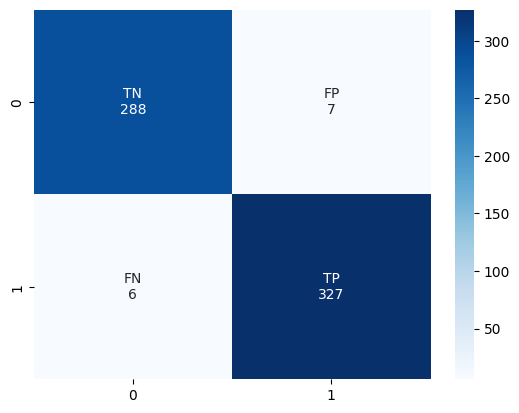

In [7]:
classifier = svm.SVC(C=10, gamma=0.1, kernel="sigmoid")
classifier.fit(tf_idf_train, Y_train)
X_test_tf_idf = tf_idf_vec.transform(X_test)
y_pred_tf_idf_svm = classifier.predict(X_test_tf_idf)
heatconmat(y_pred_tf_idf_svm, Y_test)
print(classification_report(y_pred_tf_idf_svm, Y_test, digits=4))

              precision    recall  f1-score   support

        fake     0.9422    0.9685    0.9552       286
        real     0.9731    0.9503    0.9615       342

    accuracy                         0.9586       628
   macro avg     0.9576    0.9594    0.9584       628
weighted avg     0.9590    0.9586    0.9586       628



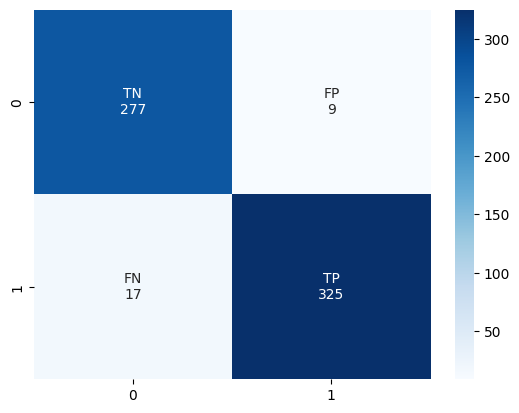

In [26]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(tf_idf_train, Y_train)
# predict the labels on validation dataset
y_pred_tf_idf_bayes = Naive.predict(X_test_tf_idf)
heatconmat(y_pred_tf_idf_bayes, Y_test)
print(classification_report(y_pred_tf_idf_bayes, Y_test, digits=4))

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# Define grid search
grid_search = GridSearchCV(estimator=neigh, 
                           param_grid=grid_params, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, Y_train)
# Print grid search summary
grid_result.best_params_

              precision    recall  f1-score   support

        fake     0.8980    0.9496    0.9231       278
        real     0.9581    0.9143    0.9357       350

    accuracy                         0.9299       628
   macro avg     0.9280    0.9320    0.9294       628
weighted avg     0.9315    0.9299    0.9301       628



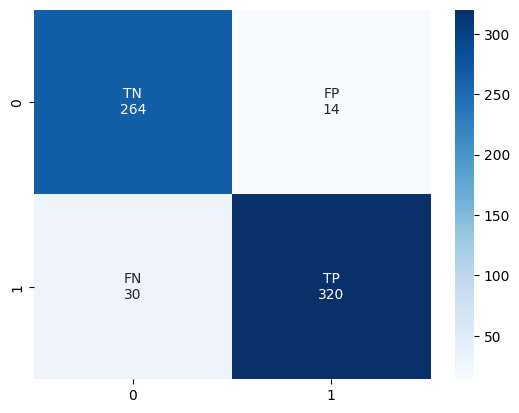

In [27]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 15, weights= 'uniform')
neigh.fit(tf_idf_train, Y_train)
y_pred_tf_idf_knn = neigh.predict(X_test_tf_idf)
heatconmat(y_pred_tf_idf_knn, Y_test)
print(classification_report(y_pred_tf_idf_knn, Y_test, digits=4))

# Pipeline

In [8]:
from preprocess import Preprocesser
preprocesser = Preprocesser()

In [9]:
from sklearn.pipeline import Pipeline

pipeLine = Pipeline([("prerocesser", preprocesser),("vectorizer", tf_idf_vec), ("svm", classifier)])

In [16]:
X_train_pipe, X_test_pipe, Y_train_pipe, Y_test_pipe = train_test_split(data["Content"], data["label"], test_size= 0.3, random_state= 42)
X_train_pipe.shape, X_test_pipe.shape, Y_train_pipe.shape, Y_test_pipe.shape

((1464,), (628,), (1464,), (628,))

In [24]:
SVM_pipeLine = pipeLine.fit(X_train_pipe, Y_train_pipe)

In [12]:

pickle.dump(SVM_pipeLine, open("model_svm.sav", "wb"))

In [13]:
SVM_tf_idf = pickle.load(open("model_svm.sav", "rb"))
y_svm_tf_idf_predict = SVM_tf_idf.predict(X_test_pipe)
print(classification_report(Y_test_pipe, y_svm_tf_idf_predict, digits=4))

              precision    recall  f1-score   support

        fake     0.9763    0.9796    0.9779       294
        real     0.9820    0.9790    0.9805       334

    accuracy                         0.9793       628
   macro avg     0.9791    0.9793    0.9792       628
weighted avg     0.9793    0.9793    0.9793       628

